# What is the True Normal Human Body Temperature? 

### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

### Exercises
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

#### 1. Is the distribution of body temperatures normal? 

* Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.

#### 2. Is the sample size large? Are the observations independent?
* Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.

#### 3. Is the true population mean really 98.6 degrees F?
* Would you use a one-sample or two-sample test? Why?
* In this situation, is it appropriate to use the $t$ or $z$ statistic? 
* Now try using the other test. How is the result be different? Why?

#### 4. At what temperature should we consider someone's temperature to be "abnormal"?
* Start by computing the margin of error and confidence interval.

#### 5. Is there a significant difference between males and females in normal temperature?
* What test did you use and why?
* Write a story with your conclusion in the context of the original problem.

### Resources

* http://www.amstat.org/publications/jse/datasets/normtemp.txt
* http://www.amstat.org/publications/jse/jse_data_archive.htm

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from statsmodels.stats.weightstats import ztest
%matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


# 1. Is the distribution of body temperatures normal?

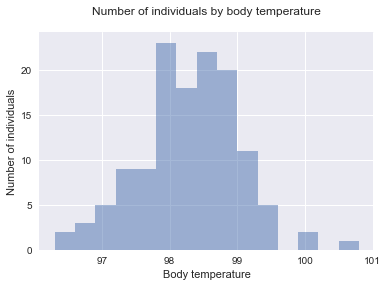

In [3]:
plt.title('Number of individuals by body temperature\n')
plt.xlabel('Body temperature')
plt.ylabel('Number of individuals')

plt.hist(df.temperature, bins = 15, alpha=0.5)
plt.show()

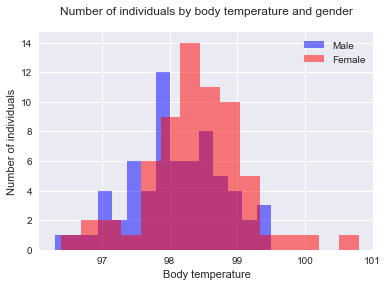

In [4]:
M = df[df.gender == 'M']
F = df[df.gender == 'F']

plt.title('Number of individuals by body temperature and gender\n')
plt.xlabel('Body temperature')
plt.ylabel('Number of individuals')

plt.hist(M.temperature, bins = 15, alpha=0.5, label='Male', color = 'blue')
plt.hist(F.temperature, bins = 15, alpha=0.5, label='Female', color = 'red')
plt.legend(loc='upper right')
plt.show()

In [5]:
W, pval = stats.shapiro(df.temperature)
print('p = ' + str(round(pval,4)))

p = 0.2332


No, the distribution is *not* normal. While the above results from the Shapiro-Wilk test for normality indicate that the data *are* (normally distributed (p = .23), the histograms reveal they are not. A histogram of the data shows that the left tail is relatively heavy. Furthermore, when the distribution is grouped by gender, it looks bimodal. Overall, body temperatures for women appear to be slightly higher than body temperatures for men. The distribution for men appears to be slightly more normally distributed than the distribution for women. 

# 2. Is the sample size large? Are the observations independent?

In [6]:
len(df.temperature)

130

The sample size is 130, which is relatively large.  Because each observation is drawn from a different individual, they are independent.

# 3. Is the true population mean really 98.6 degrees F?

In [7]:
test_stat, pval = ztest(x1 = df.temperature, value = 98.6, alternative = 'two-sided')
print('p = ' + str(round(pval,8)))

p = 5e-08


The sample mean is significantly different from 98.6 (p < .001), so I reject the hypothesis that the true population mean is 98.6.

## 3A. Would you use a one-sample or two-sample test? Why?

I'd use a one-sample test because the goal is to compare the provided data (the sample) to a hypothesized average value (98.6).  A two-sample test is used when comparing two samples of data to one another (e.g., males vs. females).

## 3B. In this situation, is it appropriate to use the $t$ or $z$ statistic? 

Because the goal is to compare the mean of one group to a hypothesized mean, and the sample size is greater than 30, the z-statistic is appropriate.

## 3C. Now try using the other test. How is the result be different? Why?

In [8]:
test_stat, pval = stats.ttest_1samp(df['temperature'], 98.6)
print('p = ' + str(round(pval,8)))

p = 2.4e-07


Even when using a t-test, the sample mean is significantly different from 98.6 (p < .001), so I reject the hypothesis that the true population mean is 98.6.

# 4. At what temperature should we consider someone's temperature to be "abnormal"?

In [9]:
mean = np.mean(df.temperature)
me = 1.96 * np.std(df.temperature) # margin of error
CI = [round(mean-me,2), round(mean+me,2)]
print(CI)

[96.82, 99.68]


The 95% confidence interval is (96.82, 99.68), so any temperature below 96.82 or above 99.68 should be considered "abnormal". However, because body temperatures for men and women appear to differ, a 95% confidence interval should be calculated for each (see code below). The 95% CI for men is (96.75, 99.46), and the 95% CI for women is (96.95, 99.84).

In [10]:
mean_M = np.mean(M.temperature)
me_M = 1.96 * np.std(M.temperature) # margin of error
CI_M = [round(mean_M - me_M,2), round(mean_M + me_M,2)]
print(CI_M)

[96.75, 99.46]


In [11]:
mean_F = np.mean(F.temperature)
me_F = 1.96 * np.std(F.temperature) # margin of error
CI_F = [round(mean_F - me_F,2), round(mean_F + me_F,2)]
print(CI_F)

[96.95, 99.84]


# 5. Is there a significant difference between males and females in normal temperature?

In [12]:
temp_M = df[df.gender == "M"].temperature
temp_F = df[df.gender == "F"].temperature

test_stat, pval = stats.ttest_ind(temp_M, temp_F)
print('p = ' + str(round(pval,4)))

p = 0.0239


Yes, there is a statistically significant difference (p < .05) between male and female body temperatures.  To determine this, I used a t-test, which allows you to test for a difference in means between two independent samples.

# Summary

In [13]:
print('Overall mean: ' + str(round(np.mean(df.temperature),2)))
print('Male mean: ' + str(round(np.mean(temp_M),2)))
print('Female mean: ' + str(round(np.mean(temp_F),2)))

Overall mean: 98.25
Male mean: 98.1
Female mean: 98.39


While the generally accepted normal body temperature is 98.6$^{\circ}$F, the data analyzed here suggest that this value may not be accurate.  The mean temperature in this dataset (98.25$^{\circ}$F) is significantly different from 98.6$^{\circ}$F.  Furthermore, there appears to be a statistically significant difference between the average male body temperature (98.10$^{\circ}$F) and the average female body temperature (98.39$^{\circ}$F).  This suggests that the generally-reported normal body temperature may need to be adjusted to take gender into account.